In [33]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#IMPORT DATA FOLLOWING P1_Q2 FOR 2020YTD
snp_path = Path("SnP500_data.csv")
snp_data = pd.read_csv(snp_path, index_col="Dates", infer_datetime_format=True, parse_dates=True)
snp_data = snp_data.sort_index()

In [35]:
snp_2020 = snp_data.loc['2020-01-01':'2020-05-07']

In [36]:
snp_08crash = snp_data.loc['2008-08-15':'2008-12-24']

In [37]:
snp_08crash_df = snp_08crash.reset_index()
snp_2020_df = snp_2020.reset_index()

In [38]:
master_df = pd.concat([snp_08crash_df,snp_2020_df], join="inner", axis="columns")
master_df.head()

,Dates,S&P 500 (^SPX) - Index Value,Dates,S&P 500 (^SPX) - Index Value
0,2008-08-15,1298.20,2020-01-02,3257.85
1,2008-08-18,1278.60,2020-01-03,3234.85
2,2008-08-19,1266.69,2020-01-06,3246.28
3,2008-08-20,1274.54,2020-01-07,3237.18
4,2008-08-21,1277.72,2020-01-08,3253.05


In [39]:
df_clean = master_df.drop(columns=["Dates"])

In [40]:
df_clean.columns = ['S&P 500 2008','S&P 500 2020']

In [41]:
df_clean.head()

,S&P 500 2008,S&P 500 2020
0,1298.20,3257.85
1,1278.60,3234.85
2,1266.69,3246.28
3,1274.54,3237.18
4,1277.72,3253.05


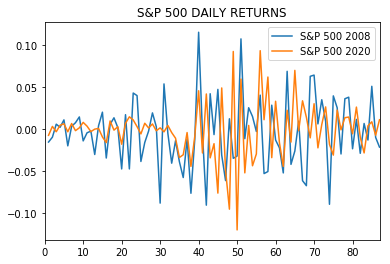

In [42]:
#CALCULATE PERCENTAGE_CHANGE
df_pct_change = df_clean.pct_change()
df_pct_change.plot(title='S&P 500 DAILY RETURNS')

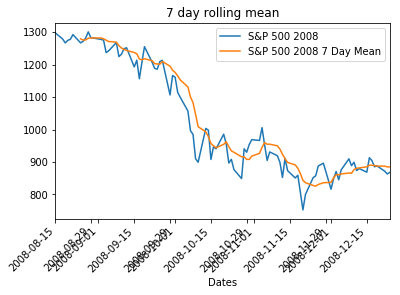

In [44]:
# Set figure of the daily closing prices of Tesla

ax = snp_08crash.plot(title='7 day rolling mean')

# Plot 180-Day Rolling Mean on the same figure
snp_08crash.rolling(window=7).mean().plot(ax=ax, rot=45)

# Set the legend of the figure
ax.legend(["S&P 500 2008", "S&P 500 2008 7 Day Mean"]);

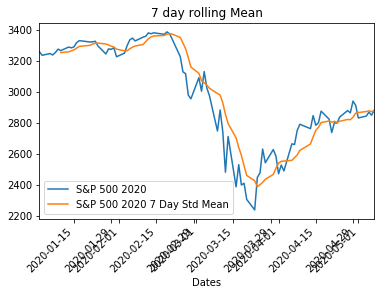

In [45]:
ax = snp_2020.plot(title='7 day rolling Mean')

# Plot 180-Day Rolling Mean on the same figure
snp_2020.rolling(window=7).mean().plot(ax=ax, rot=45)

# Set the legend of the figure
ax.legend(["S&P 500 2020", "S&P 500 2020 7 Day Std Mean"]);

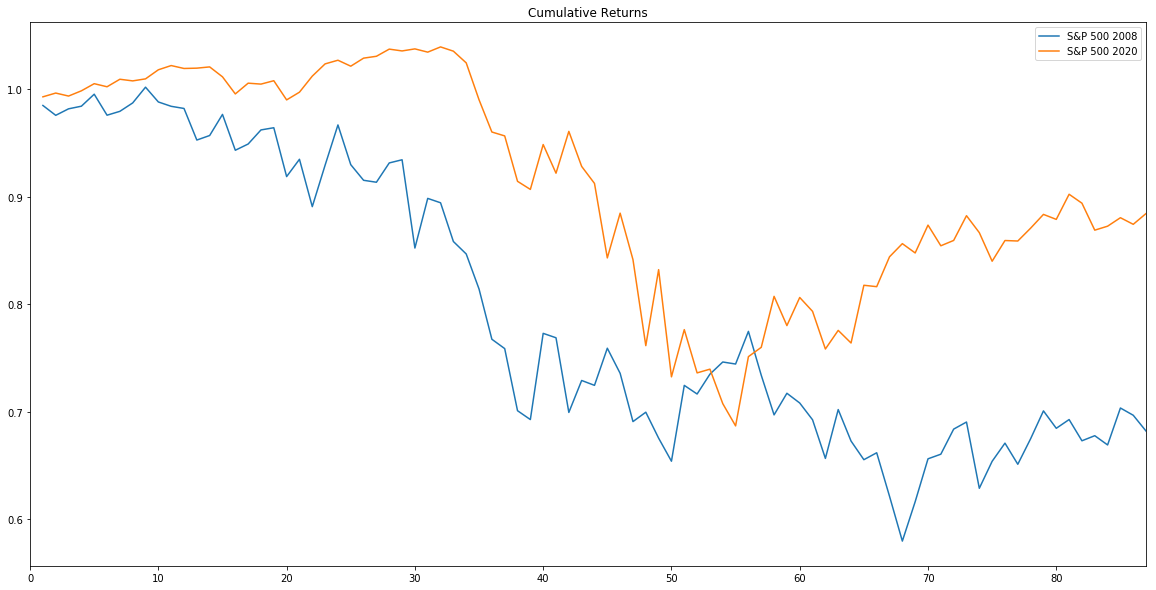

In [46]:
cumulative_returns = (1 + df_pct_change).cumprod()
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

In [51]:
#CALCULATE VOLATITLITY
# volatitily = std
# first percent change
volatility = df_pct_change.std() * np.sqrt(252)
volatility

S&P 500 2008    0.633890
S&P 500 2020    0.525632
dtype: float64

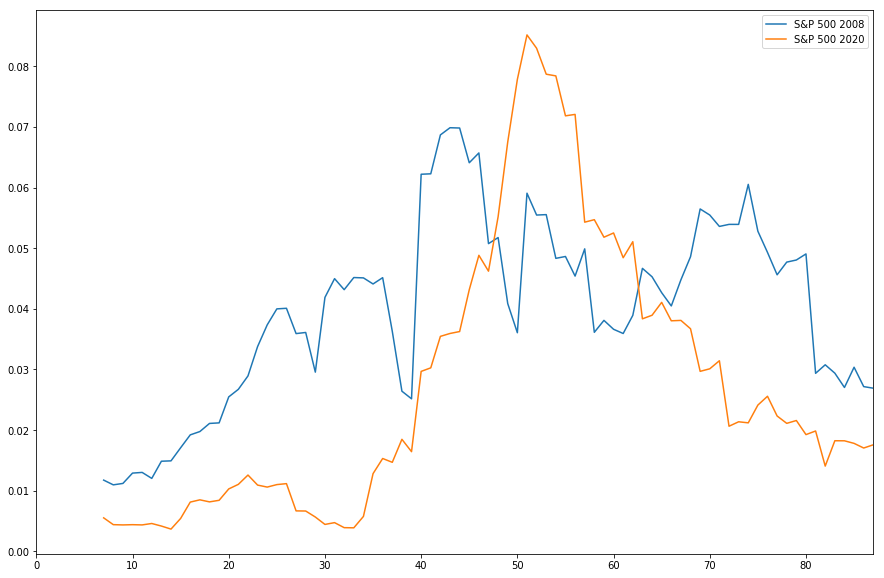

In [50]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
rolling_std =df_pct_change.rolling(window=7).std()
rolling_std.plot(figsize=(15,10))

In [76]:
m1_df =pd.read_csv(Path("M1.csv"), index_col='DATE', infer_datetime_format=True, parse_dates=True).sort_index(ascending = False)

In [77]:
m1_snp_df =pd.concat([snp_2020, m1_df,], axis='columns', join='inner').sort_index()
m1_snp_plot = m1_snp_df.reset_index()

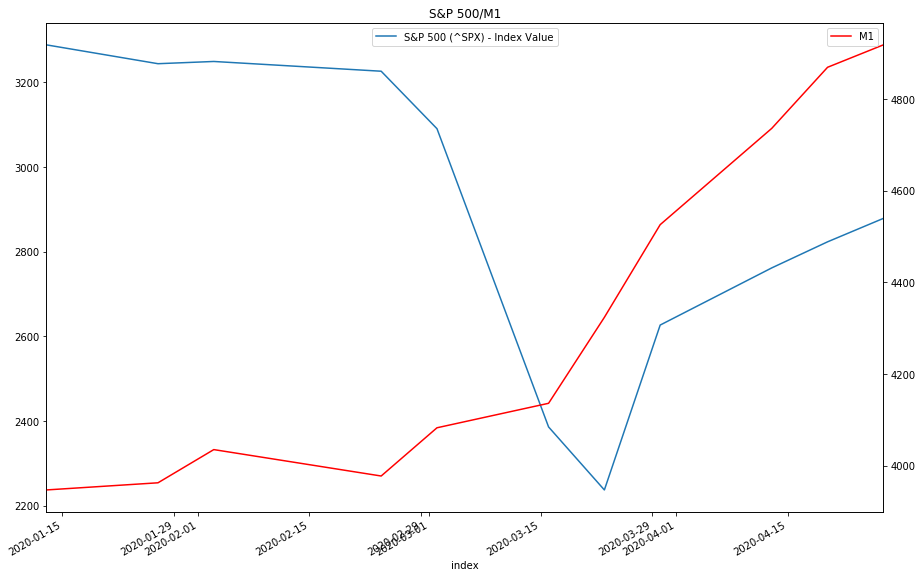

In [78]:
ax = m1_snp_plot.plot('index','S&P 500 (^SPX) - Index Value')
ax1 = ax.twinx()
ax.legend(loc=9)
m1_snp_plot.plot('index','M1', ax=ax1, color = 'r', figsize=(15,10), title = 'S&P 500/M1')

In [54]:
avg_daily_return_snp_08crash = df_pct_change.mean()['S&P 500 2008']
avg_daily_return_snp_08crash

-0.003603566717821123

In [57]:
std_dev_daily_return_snp_08crash = df_pct_change.std()['S&P 500 2008']
std_dev_daily_return_snp_08crash

0.03993132341731856

In [55]:
avg_daily_return_snp_2020 = df_pct_change.mean()['S&P 500 2020']
avg_daily_return_snp_2020

-0.0008648115132847587

In [58]:
std_dev_daily_return_snp_2020 = df_pct_change.std()['S&P 500 2020']
std_dev_daily_return_snp_2020

0.03311172846533354

In [72]:
# Save the last day's closing price
snp_2020_last_price = snp_2020['S&P 500 (^SPX) - Index Value'][-1]
snp_2020_last_price

2881.19

In [121]:
num_simulations = 1000
num_trading_days = 166



# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_snp_2020_df = pd.DataFrame()
snp_2020_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_snp_2020_prices = [snp_2020_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_snp_2020_price = simulated_snp_2020_prices[-1] * (1 + np.random.normal(avg_daily_return_snp_2020, std_dev_daily_return_snp_2020))
#       simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_snp_2020_prices.append(simulated_snp_2020_price)
#       simulated_mu_prices.append(simulated_mu_price)
   
    simulated_snp_2020_df = pd.Series(simulated_snp_2020_prices)
    
    simulated_daily_returns = simulated_snp_2020_df.pct_change()
    snp_2020_cumulative_returns[n] = (1 + simulated_daily_returns.fillna(0)).cumprod()
snp_2020_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997226,0.997270,1.019121,0.986829,0.981664,1.012265,0.973257,1.005595,1.076326,1.000913,...,1.018029,0.939038,1.051879,0.980669,0.961147,1.015508,1.025549,1.017827,1.012104,1.057244
2,0.983819,0.997665,1.020603,0.970029,1.037844,1.044935,0.970928,0.979941,1.047173,0.995393,...,1.037154,0.931967,1.015673,1.028511,0.964387,1.060496,1.053313,1.033755,1.032298,1.012434
3,1.006559,1.046093,0.951528,0.943066,1.086572,1.084884,0.947509,0.974563,1.094526,1.025990,...,1.076907,0.954833,1.059053,0.954921,0.933332,1.101798,1.010744,1.089192,1.021589,1.010642
4,1.018204,1.036976,0.993821,0.926170,1.074291,1.104889,0.982551,0.963499,1.066641,0.968893,...,1.107585,0.906551,1.078742,1.023731,0.943718,1.041880,1.045435,1.100058,1.003980,0.977976


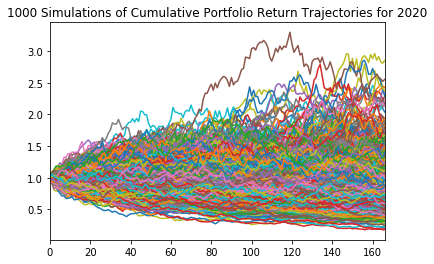

In [122]:
# Visualize the Simulation
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories for 2020"
snp_2020_cumulative_returns.plot(legend=None, title=plot_title)

In [125]:
# Select the last row for project stock prices (prices of each simulation on the 166TH trading day)
ending_cumulative_returns = snp_2020_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    0.532873
1    0.461913
2    0.663274
3    0.726531
4    1.322860
Name: 166, dtype: float64

In [129]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.410950
0.95    1.568219
Name: 166, dtype: float64

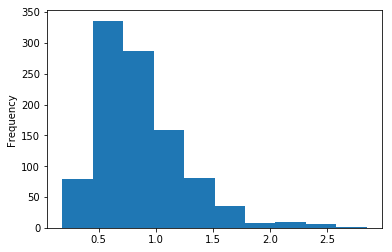

In [130]:
ending_cumulative_returns.plot(kind='hist')

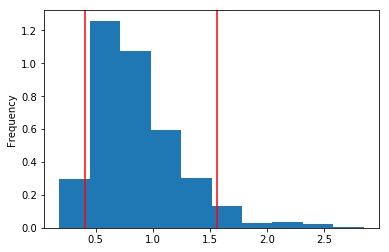

In [131]:
# Visualize the distribution of the ending returns
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')